In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


Bad key savefig.frameon in file /home/arihant/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/arihant/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/arihant/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

In [2]:
df = pd.read_csv('imdb_movie_list.csv')

In [3]:
df.head()

,tconst,titleType,year,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes
0,tt0111161,movie,1994,The Shawshank Redemption,The Shawshank Redemption,142,Drama,9.3,2203956
1,tt0468569,movie,2008,The Dark Knight,The Dark Knight,152,"Action,Crime,Drama",9.0,2184629
2,tt1375666,movie,2010,Inception,Inception,148,"Action,Adventure,Sci-Fi",8.8,1933557
3,tt0137523,movie,1999,Fight Club,Fight Club,139,Drama,8.8,1759843
4,tt0110912,movie,1994,Pulp Fiction,Pulp Fiction,154,"Crime,Drama",8.9,1731665


In [4]:
genres = set({})

In [5]:
for i in df.index:
    g = (df['genres'][i]).split(",")
    for j in g:
        if j != '\\N':
            genres.add(j)

In [6]:
print(genres)

{'Action', 'Adult', 'Mystery', 'Horror', 'Sci-Fi', 'Fantasy', 'Thriller', 'Sport', 'Game-Show', 'Music', 'Romance', 'Animation', 'Documentary', 'History', 'Biography', 'News', 'Film-Noir', 'War', 'Adventure', 'Drama', 'Western', 'Family', 'Comedy', 'Musical', 'Crime'}


In [7]:
genres_freq = []

In [8]:
for g in genres:
    count = 1
    for i in df.index:
        if df['genres'][i] == g:
            count += 1
    genres_freq.append([g,count])

In [34]:
genres_freq

[['Fantasy', 15],
 ['Music', 4],
 ['Horror', 571],
 ['Crime', 15],
 ['Action', 104],
 ['Family', 10],
 ['Biography', 9],
 ['Game-Show', 1],
 ['Romance', 46],
 ['Mystery', 3],
 ['Sport', 1],
 ['Western', 92],
 ['Comedy', 1622],
 ['Drama', 2327],
 ['Adult', 1],
 ['War', 4],
 ['Thriller', 176],
 ['Documentary', 526],
 ['Film-Noir', 1],
 ['History', 2],
 ['Animation', 4],
 ['Musical', 13],
 ['Adventure', 9],
 ['News', 1],
 ['Sci-Fi', 32]]

In [39]:
x = []
y = []
for i in genres_freq:
    x.append(i[0])
    y.append(i[1])

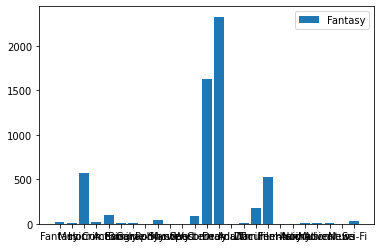

<Figure size 432x288 with 0 Axes>

In [48]:
plt.bar(x,y)
plt.legend(x)
plt.show()
plt.savefig('foo.png')

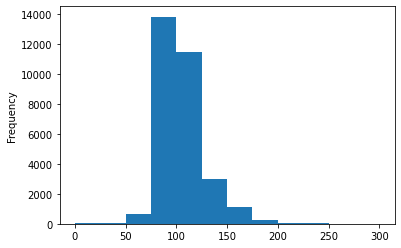

In [15]:
nbins = [0,25,50,75,100,125,150,175,200,225,250,275,300]
for i in df.index:
    if df['runtimeMinutes'][i] == '\\N':
        df['runtimeMinutes'][i] = 0
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'])
df.sort_values('runtimeMinutes')
plot = df['runtimeMinutes'].plot.hist(by=None, bins=nbins)
plot.set(title = "Frequency Distribution of Movies by Runtime",
       xlabel = "Runtime (in minutes)",
       ylabel = "Precipitation (inches)")

0